## Ray tracing

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
class SphericalInterface(object):
    diameter = 25.4
    def __init__(self, z0, R, n_1, n_2, diameter=None):
        self.z0 = z0
        self.R = R
        if diameter is not None:
            self.diameter = diameter
        self.n_1 = n_1
        self.n_2 = n_2
        self.z_center = z0 + R
## TODO COMPLETE THE __init__
    def __repr__(self):
        return f'SphericalInterface(z0={self.z0}, R={self.R}, n_1={self.n_1}, n_2={self.n_2})'
## TODO WRITE __repr__

    def plot(self, ax):
        y = np.linspace(-self.diameter/2, self.diameter/2, 200)
        z = self.z_center - np.sqrt(self.R**2 - y**2)*np.sign(self.R)
        ax.plot(z, y)
        ax.set_aspect(1)
## TODO COMPLETE plot

#### SOLUTION : Refraction by a spherical interface
    def intersection(self, ray):
        k = ray.k
        delta_p0 = ray.p0 - np.array([0,0, self.z_center])
        a = np.linalg.norm(k)**2
        b = 2*np.dot(k, delta_p0)
        c = np.linalg.norm(delta_p0)**2 - self.R**2
        disc = b**2 - 4*a*c
        if self.R>0:
            t = (-b - np.sqrt(disc))/(2*a)
        else:
            t = (-b + np.sqrt(disc))/(2*a)
        return ray.p0 + t*k

    def refract(self, beam):
        p2 = self.intersection(beam)
        n = p2 - np.array([0,0, self.z_center])
        n = n/np.linalg.norm(n)
        k_par = beam.k - np.dot(beam.k, n)*n
        alpha = np.sqrt(self.n_2**2 - np.linalg.norm(k_par)**2)
        if self.R>0:
            k2 = k_par - alpha*n
        else:
            k2 = k_par + alpha*n
        return Ray(p2, k2)


class PlaneInterface(SphericalInterface):
    def __init__(self, self.z_center, n_1, n_2):
        pass
    def intersection(self, ray):
        pass
    def refract(self, ray):
        pass
    
    

In [30]:
class Ray():
    def __init__(self, p0, k, n=None):
        self.p0 = p0
        self.k = k
        if n is not None:
            self.normalize(n)
    def normalize(self, n):
        """Normalize k such that ||k||=n"""
        self.k = self.k/np.linalg.norm(self.k)*n

    def __repr__(self):
        return f"Ray(p0={self.p0}, k={self.k}"


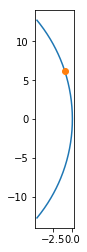

In [37]:
z0 = 0
R = 20
n1 = 1
n2 = 1.5
interf = SphericalInterface(z0, -R, n1, n2)

fig = plt.figure()
ax = fig.subplots(1, 1)
interf.plot(ax)

p1 = np.array([0,5,-3])
k1 = np.array([0, .5, np.sqrt(.75)])
ray = Ray(p1, k1)

ray1 = interf.refract(ray)
ax.plot([ray1.p0[2]], [ray1.p0[1]], 'o')

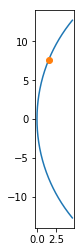

In [38]:
z0 = 0
R = 20
n1 = 1
n2 = 1.5
interf = SphericalInterface(z0, R, n1, n2)

fig = plt.figure()
ax = fig.subplots(1, 1)
interf.plot(ax)

ray1 = interf.refract(ray)
ax.plot([ray1.p0[2]], [ray1.p0[1]], 'o')

In [39]:
class Beam(list):
    #There is no __init__ method. 
    def plot(self, ax):
        y_coordinates = [ray.p0[1] for ray in self]
        z_coordinates = [ray.p0[2] for ray in self]
        ax.plot(z_coordinates, y_coordinates)


In [40]:
class OpticalSystem(list):
    def calculate_beam(self, r0):
        beam = Beam()
        beam.append(r0)
        for interface in self:
            beam.append(interface.refract(beam[-1]))
        return beam
    def plot(self, ax):
        for interface in self:
            interface.plot(ax)


In [41]:
p1 = np.array([0,0,-3])
z0 = 0
R = 20
n1 = 1
n2 = 1.5
k1 = np.array([0, .5, np.sqrt(.75)])

ray = Ray(p1, k1)
interf = SphericalInterface(z0, R, n1, n2)

In [42]:
interf.refract(ray)

Ray(p0=[0.         1.77775806 0.07916728], k=[0.         0.4495773  1.43104167]

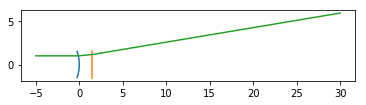

In [45]:
n_LAH64 = 1.77694
n_SF11 = 1.76583
n_air = 1.0002992


S1 = SphericalInterface(0,-4.7, n_air, n_SF11, diameter=3)

S2 = SphericalInterface(1.5, 1E10, n_SF11, n_air, diameter=3)

LC2969 = OpticalSystem()
LC2969.append(S1)
LC2969.append(S2)

screen = SphericalInterface(30, 1e10, 30, n_air, n_air)

system = OpticalSystem()
system.extend(LC2969)
system.append(screen)

r0 = Ray(p0=np.array([0,1,-5]), k=np.array([0,0,1]), n=n_air)
beam = system.calculate_beam(r0)

fig = plt.figure()
ax = fig.subplots(1, 1)

LC2969.plot(ax)
beam.plot(ax)
